<a href="https://colab.research.google.com/github/Kevin-Cutler/Final-Project/blob/Kevin_Test_Branch/Random_Forest_Movie_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Initial imports.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced





In [104]:
# Read in Movies CSV
movies_df = pd.read_csv("/content/movies.csv")
movies_df.head(20)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [105]:
# Check for duplicates in the dataset movies_df
print(f"Duplicate entries: {movies_df['name'].duplicated().sum()}")



Duplicate entries: 156


In [106]:
# Read in Top Movies CSV
top_4000_movies_df = pd.read_csv("/content/top_4000_movies_data.csv", parse_dates=['Release Date'], dayfirst=True)
top_4000_movies_df.head(20)

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523
5,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,309420425,960996492
6,2017-11-13,Justice League,300000000,229024295,655945209
7,2015-06-10,Spectre,300000000,200074175,879500760
8,2019-12-18,Star Wars: The Rise of Skywalker,275000000,515202542,1072848487
9,2018-05-23,Solo: A Star Wars Story,275000000,213767512,393151347


In [107]:
# Check for duplicates in the dataset top_4000_movies_df
print(f"Duplicate entries: {top_4000_movies_df['Movie Title'].duplicated().sum()}")

Duplicate entries: 48


In [108]:
top_4000_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Date       3979 non-null   datetime64[ns]
 1   Movie Title        4000 non-null   object        
 2   Production Budget  4000 non-null   int64         
 3   Domestic Gross     4000 non-null   int64         
 4   Worldwide Gross    4000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 156.4+ KB


In [109]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [110]:
# See what data you have available
movies_df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [111]:
# See what data you have available
top_4000_movies_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross'],
      dtype='object')

In [112]:
# Combine the data into a single dataset.
#Merged_Movie_df = top_4000_movies_df.merge( movies_df, left_on='Movie Title', right_on='name')
Merged_Movie_df = top_4000_movies_df.merge( movies_df, how='inner', left_on='Movie Title', right_on='name')

Merged_Movie_df.head(200)


,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2011-05-26,Kung Fu Panda 2,150000000,165249063,664837547,Kung Fu Panda 2,PG,Animation,2011,"May 26, 2011 (United States)",7.2,262000.0,Jennifer Yuh Nelson,Jonathan Aibel,Jack Black,United States,150000000.0,6.656923e+08,DreamWorks Animation,90.0
196,2015-05-14,Mad Max: Fury Road,150000000,153636354,367457874,Mad Max: Fury Road,R,Action,2015,"May 15, 2015 (United States)",8.1,912000.0,George Miller,George Miller,Tom Hardy,Australia,150000000.0,3.756588e+08,Warner Bros.,120.0
197,2003-05-11,The Matrix Revolutions,150000000,139270910,427300260,The Matrix Revolutions,R,Action,2003,"November 5, 2003 (United States)",6.7,459000.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,United States,150000000.0,4.273443e+08,Warner Bros.,129.0
198,2018-03-20,Ready Player One,150000000,137690172,579055653,Ready Player One,PG-13,Action,2018,"March 29, 2018 (United States)",7.4,388000.0,Steven Spielberg,Zak Penn,Tye Sheridan,United States,175000000.0,5.828937e+08,Warner Bros.,140.0


In [123]:
c_df = Merged_Movie_df.copy()

In [124]:
c_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'name', 'rating', 'genre', 'year', 'released',
       'score', 'votes', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime'],
      dtype='object')

In [125]:
c_df.head()

,Release Date,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [126]:
c_df = c_df.drop(['Release Date', 'year', 'director', 'writer', 'name','country','star'], axis = 1)

In [118]:
c_df.head()

,Movie Title,Production Budget,Domestic Gross,Worldwide Gross,rating,genre,released,score,votes,star,budget,gross,company,runtime
0,Avengers: Endgame,400000000,858373000,2797800564,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Robert Downey Jr.,356000000.0,2.797501e+09,Marvel Studios,181.0
1,Avengers: Age of Ultron,365000000,459005868,1395316979,PG-13,Action,"May 1, 2015 (United States)",7.3,777000.0,Robert Downey Jr.,250000000.0,1.402810e+09,Marvel Studios,141.0
2,Avengers: Infinity War,300000000,678815482,2044540523,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Robert Downey Jr.,321000000.0,2.048360e+09,Marvel Studios,149.0
3,Justice League,300000000,229024295,655945209,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Ben Affleck,300000000.0,6.579270e+08,Warner Bros.,120.0
4,Spectre,300000000,200074175,879500760,PG-13,Action,"November 6, 2015 (United States)",6.8,393000.0,Daniel Craig,245000000.0,8.806815e+08,B24,148.0


In [117]:
df = Merged_Movie_df.copy()

In [20]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 3120
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release Date       3121 non-null   datetime64[ns]
 1   Movie Title        3121 non-null   object        
 2   Production Budget  3121 non-null   int64         
 3   Domestic Gross     3121 non-null   int64         
 4   Worldwide Gross    3121 non-null   int64         
 5   name               3121 non-null   object        
 6   rating             3117 non-null   object        
 7   genre              3121 non-null   object        
 8   year               3121 non-null   int64         
 9   released           3120 non-null   object        
 10  score              3121 non-null   float64       
 11  votes              3121 non-null   float64       
 12  director           3121 non-null   object        
 13  writer             3121 non-null   object        
 14  star    

In [21]:
# Check for duplicates in the dataset Merged_Movie_df
print(f"Duplicate entries: {Merged_Movie_df.duplicated().sum()}")

Duplicate entries: 0


In [22]:
Merged_Movie_df.nunique()

Release Date         1862
Movie Title          2923
Production Budget     244
Domestic Gross       2959
Worldwide Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                  69
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [23]:
Merged_Movie_df.columns

Index(['Release Date', 'Movie Title', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross', 'name', 'rating', 'genre', 'year', 'released',
       'score', 'votes', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime'],
      dtype='object')

In [24]:
Merged_Movie_df.rename(columns={'Release Date':'Release_Date', 'Movie Title':'Movie_Title', 'Production Budget':'Production_Budget', 'Domestic Gross':'Domestic_Gross',
       'Worldwide Gross':'Worldwide_Gross'},inplace=True)

In [25]:
Merged_Movie_df.head()


,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.3,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",6.8,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [26]:
# Check IMDB score column to categorize the score ratings as Favorable vs Unfavorable
Merged_Movie_df.score.unique()
o_df = Merged_Movie_df.copy()


In [27]:
# Transform the score into over 6 or under 6 categories

def change_score_to_Category(IMDB):
  if IMDB >= 6 :
    return "Favorable"
  else: 
    return "Unfavorable"

Merged_Movie_df['score'] = Merged_Movie_df['score'].apply(change_score_to_Category)
Merged_Movie_df.head()
  

,Release_Date,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",Favorable,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",Favorable,777000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250000000.0,1.402810e+09,Marvel Studios,141.0
2,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",Favorable,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
3,2017-11-13,Justice League,300000000,229024295,655945209,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",Favorable,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
4,2015-06-10,Spectre,300000000,200074175,879500760,Spectre,PG-13,Action,2015,"November 6, 2015 (United States)",Favorable,393000.0,Sam Mendes,John Logan,Daniel Craig,United Kingdom,245000000.0,8.806815e+08,B24,148.0


In [28]:
Merged_Movie_df.nunique()

Release_Date         1862
Movie_Title          2923
Production_Budget     244
Domestic_Gross       2959
Worldwide_Gross      2961
name                 2923
rating                  8
genre                  14
year                   41
released             1732
score                   2
votes                 633
director             1287
writer               1933
star                 1031
country                36
budget                241
gross                3033
company               735
runtime               124
dtype: int64

In [29]:
Merged_Movie_df.dtypes

Release_Date         datetime64[ns]
Movie_Title                  object
Production_Budget             int64
Domestic_Gross                int64
Worldwide_Gross               int64
name                         object
rating                       object
genre                        object
year                          int64
released                     object
score                        object
votes                       float64
director                     object
writer                       object
star                         object
country                      object
budget                      float64
gross                       float64
company                      object
runtime                     float64
dtype: object

In [30]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Release_Date has 0 null values
Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column name has 0 null values
Column rating has 4 null values
Column genre has 0 null values
Column year has 0 null values
Column released has 1 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column country has 1 null values
Column budget has 117 null values
Column gross has 7 null values
Column company has 1 null values
Column runtime has 2 null values


In [31]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3121 entries, 0 to 3120
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       3121 non-null   datetime64[ns]
 1   Movie_Title        3121 non-null   object        
 2   Production_Budget  3121 non-null   int64         
 3   Domestic_Gross     3121 non-null   int64         
 4   Worldwide_Gross    3121 non-null   int64         
 5   name               3121 non-null   object        
 6   rating             3117 non-null   object        
 7   genre              3121 non-null   object        
 8   year               3121 non-null   int64         
 9   released           3120 non-null   object        
 10  score              3121 non-null   object        
 11  votes              3121 non-null   float64       
 12  director           3121 non-null   object        
 13  writer             3121 non-null   object        
 14  star    

In [32]:
# Drop Null Rows and useless columns

Merged_Movie_df = Merged_Movie_df.dropna()
# Remove two columns name is 'name' and 'released' and Release_Date and 'country'
Merged_Movie_df = Merged_Movie_df.drop(['name', 'released', 'Release_Date', 'country' ], axis = 1)


In [33]:
Merged_Movie_df = Merged_Movie_df.drop_duplicates(subset= 'Movie_Title', keep= 'first', inplace=False)

In [34]:
Merged_Movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 3120
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Movie_Title        2847 non-null   object 
 1   Production_Budget  2847 non-null   int64  
 2   Domestic_Gross     2847 non-null   int64  
 3   Worldwide_Gross    2847 non-null   int64  
 4   rating             2847 non-null   object 
 5   genre              2847 non-null   object 
 6   year               2847 non-null   int64  
 7   score              2847 non-null   object 
 8   votes              2847 non-null   float64
 9   director           2847 non-null   object 
 10  writer             2847 non-null   object 
 11  star               2847 non-null   object 
 12  budget             2847 non-null   float64
 13  gross              2847 non-null   float64
 14  company            2847 non-null   object 
 15  runtime            2847 non-null   float64
dtypes: float64(4), int64(4),

In [35]:
# Check for null values
for column in Merged_Movie_df.columns:
    print(f"Column {column} has {Merged_Movie_df[column].isnull().sum()} null values")

Column Movie_Title has 0 null values
Column Production_Budget has 0 null values
Column Domestic_Gross has 0 null values
Column Worldwide_Gross has 0 null values
Column rating has 0 null values
Column genre has 0 null values
Column year has 0 null values
Column score has 0 null values
Column votes has 0 null values
Column director has 0 null values
Column writer has 0 null values
Column star has 0 null values
Column budget has 0 null values
Column gross has 0 null values
Column company has 0 null values
Column runtime has 0 null values


In [36]:
Merged_Movie_df.columns

Index(['Movie_Title', 'Production_Budget', 'Domestic_Gross', 'Worldwide_Gross',
       'rating', 'genre', 'year', 'score', 'votes', 'director', 'writer',
       'star', 'budget', 'gross', 'company', 'runtime'],
      dtype='object')

In [37]:
# Transform Production_Budget column to scale for the model
Merged_Movie_df['Production_Budget'] =  Merged_Movie_df['Production_Budget']/1000000
# Transform Domestic_Gross column to scale for the model
Merged_Movie_df['Domestic_Gross'] = Merged_Movie_df['Domestic_Gross']/1000000
# Transform Worldwide_Gross column to scale for the model
Merged_Movie_df['Worldwide_Gross'] = Merged_Movie_df['Worldwide_Gross']/1000000
# Transform budget column to scale for the model
Merged_Movie_df['budget'] = Merged_Movie_df['budget']/1000000
# Transform gross column to scale for the model
Merged_Movie_df['gross'] = Merged_Movie_df['gross']/1000000
# Transform votes column to scale for the model
Merged_Movie_df['votes'] = Merged_Movie_df['votes']/10000


Merged_Movie_df.head()
df = Merged_Movie_df.copy()


In [38]:
# Select all of the columns with a object dtype
Merged_Movie_df.select_dtypes(include = 'object') 

,Movie_Title,rating,genre,score,director,writer,star,company
0,Avengers: Endgame,PG-13,Action,Favorable,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios
1,Avengers: Age of Ultron,PG-13,Action,Favorable,Joss Whedon,Joss Whedon,Robert Downey Jr.,Marvel Studios
2,Avengers: Infinity War,PG-13,Action,Favorable,Anthony Russo,Christopher Markus,Robert Downey Jr.,Marvel Studios
3,Justice League,PG-13,Action,Favorable,Zack Snyder,Jerry Siegel,Ben Affleck,Warner Bros.
4,Spectre,PG-13,Action,Favorable,Sam Mendes,John Logan,Daniel Craig,B24
...,...,...,...,...,...,...,...,...
3115,The Lost City,R,Drama,Favorable,Andy Garcia,Guillermo Cabrera Infante,Andy Garcia,Crescent Drive Pictures
3116,Next Friday,R,Comedy,Favorable,Steve Carr,Ice Cube,Ice Cube,New Line Cinema
3117,Poltergeist III,PG,Horror,Unfavorable,Gary Sherman,Gary Sherman,Heather O'Rourke,Metro-Goldwyn-Mayer (MGM)
3119,The Runaways,R,Biography,Favorable,Floria Sigismondi,Floria Sigismondi,Kristen Stewart,River Road Entertainment


In [39]:
from sklearn.preprocessing import LabelEncoder
cols = ['Movie_Title', 'rating', 'genre', 'score','director','writer','star','company']

In [40]:
df2 = Merged_Movie_df.copy()


In [41]:
df2[cols] = df2[cols].apply(LabelEncoder().fit_transform)

In [42]:
df2.head(100)

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,score,votes,director,writer,star,budget,gross,company,runtime
0,213,400.0,858.373000,2797.800564,4,0,2019,0,90.3,67,272,781,356.0,2797.501328,446,181.0
1,212,365.0,459.005868,1395.316979,4,0,2015,0,77.7,634,938,781,250.0,1402.809540,446,141.0
2,214,300.0,678.815482,2044.540523,4,0,2018,0,89.7,67,272,781,321.0,2048.359754,446,149.0
3,1128,300.0,229.024295,655.945209,4,0,2017,0,41.8,1210,789,80,300.0,657.926987,647,120.0
4,1865,300.0,200.074175,879.500760,4,0,2015,0,39.3,1008,861,206,245.0,880.681519,85,148.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2697,175.0,293.004164,731.463377,3,2,2009,0,96.2,874,1360,265,175.0,735.099102,515,96.0
118,469,175.0,210.460015,797.666425,3,2,2017,0,41.7,695,1050,64,175.0,807.817888,644,105.0
119,1369,175.0,198.351526,381.687380,3,2,2009,0,15.1,954,1168,764,175.0,381.509870,252,94.0
120,406,175.0,152.901115,383.541369,0,2,2017,0,8.2,131,185,722,175.0,383.930656,515,102.0


In [43]:
X =df2.copy()
X = X.drop("score", axis=1)
X.head()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,votes,director,writer,star,budget,gross,company,runtime
0,213,400.0,858.373000,2797.800564,4,0,2019,90.3,67,272,781,356.0,2797.501328,446,181.0
1,212,365.0,459.005868,1395.316979,4,0,2015,77.7,634,938,781,250.0,1402.809540,446,141.0
2,214,300.0,678.815482,2044.540523,4,0,2018,89.7,67,272,781,321.0,2048.359754,446,149.0
3,1128,300.0,229.024295,655.945209,4,0,2017,41.8,1210,789,80,300.0,657.926987,647,120.0
4,1865,300.0,200.074175,879.500760,4,0,2015,39.3,1008,861,206,245.0,880.681519,85,148.0


In [44]:
X.describe()

,Movie_Title,Production_Budget,Domestic_Gross,Worldwide_Gross,rating,genre,year,votes,director,writer,star,budget,gross,company,runtime
count,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000
mean,1423.000000,51.219344,67.207863,150.958675,4.153495,2.868282,2004.902705,15.813076,628.132069,926.392343,484.300316,50.492763,148.316675,429.103267,111.178785
std,822.002433,46.665164,80.490857,221.120538,0.955055,2.570824,8.871299,21.317062,353.805558,526.604155,279.815665,45.413140,216.714584,188.703143,19.369090
min,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.024300,0.000000,0.000000,0.000000,0.550000,0.040397,0.000000,63.000000
25%,711.500000,20.000000,18.804358,29.937034,4.000000,0.000000,1999.000000,3.900000,317.500000,477.500000,240.500000,20.000000,29.373319,253.000000,97.000000
50%,1423.000000,35.000000,41.523271,74.180745,4.000000,3.000000,2006.000000,8.700000,646.000000,921.000000,481.000000,35.000000,74.005691,476.000000,108.000000
75%,2134.500000,65.000000,82.257359,176.933261,5.000000,4.000000,2012.000000,19.150000,948.000000,1386.500000,723.500000,65.000000,174.202867,622.000000,122.000000
max,2846.000000,400.000000,858.373000,2845.899541,6.000000,13.000000,2020.000000,240.000000,1211.000000,1826.000000,965.000000,356.000000,2847.246203,664.000000,271.000000


In [45]:
# Define target vector
y = df2["score"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: score, dtype: int64

In [46]:
y.describe()

count    2847.000000
mean        0.274675
std         0.446429
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: score, dtype: float64

In [47]:
# Check the balance of our target values
y.value_counts()

0    2065
1     782
Name: score, dtype: int64

In [48]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


**Fit the Decision Tree Model**

In [49]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

Random forest

* Statistical algorithm that is used to cluster points of data in functional groups. 
* The random forest algorithm is a supervised learning model; it uses labeled data to “learn” how to classify unlabeled data.





**Random forest algorithms are beneficial because they:**

*   Are robust against overfitting as all of those weak learners are trained on different pieces of the data.
*  Can be used to rank the importance of input variables in a natural way.
*   Can handle thousands of input variables without variable deletion.
*   Are robust to outliers and nonlinear data.
*   Run efficiently on large datasets.






The n_estimators will allow us to set the number of trees that will be created by the algorithm. Generally, the higher number makes the predictions stronger and more stable, but can slow down the output because of the higher training time allocated. The best practice is to use between 64 and 128 random forests, though higher numbers are quite common despite the higher training time. 

In [50]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=200, random_state=78) 

# **Fit the Decision Tree Model**

In [51]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# **Make Predictions Using the Testing Data**

In [52]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

# **Evaluate the Model**

In [53]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Predicted 0", "Predicted 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Predicted 0,488,27
Predicted 1,88,109


In [54]:
TP = cm_df['Predicted 0'][0]
FP = cm_df['Predicted 0'][1]
FN = cm_df['Predicted 1'][0]
TN = cm_df['Predicted 1'][1]
PN = TP+FN


# **Summary of Performancd: Confusion Matrix**

In [55]:
print('*' + '  Out of '+ str(PN)+ ' movies that obtained a "Favorable IMDB Score" (Actual 0), '+ str(TP)+ '\n   were predicted to have a "Favorable IMDB Score" (Predicted 0),\n   which is known as true positives. ')#@title

*  Out of 515 movies that obtained a "Favorable IMDB Score" (Actual 0), 488
   were predicted to have a "Favorable IMDB Score" (Predicted 0),
   which is known as true positives. 


In [56]:
print('*' + '  Out of '+str(PN)+ ' movies that obtained a "Favorable IMDB Score" (Actual 0),\n   '+str(FN) +' were predicted to have a "Unfavorable IMDB Score" (Predicted 1),\n   which are considered false negatives.')#@title

*  Out of 515 movies that obtained a "Favorable IMDB Score" (Actual 0),
   27 were predicted to have a "Unfavorable IMDB Score" (Predicted 1),
   which are considered false negatives.


In [57]:
print('*' + '  Out of '+ str(FP+TN) +' movies that obtained a "Unfavorable IMDB Score" (Actual 1),\n   '+ str(FP) +' were predicted to have a "Favorable IMDB Score" (Predicted 0)\n   and are considered false positives.')#@title

*  Out of 197 movies that obtained a "Unfavorable IMDB Score" (Actual 1),
   88 were predicted to have a "Favorable IMDB Score" (Predicted 0)
   and are considered false positives.


In [58]:
print('*' + '  Out of '+ str(FP+TN) +' movies that obtained a "Unfavorable IMDB Score" (Actual 1),\n   '+ str(TN) +' were predicted to be have a "Unfavorable IMDB Score" (Predicted 1)\n   and are considered true negatives.')#@title

*  Out of 197 movies that obtained a "Unfavorable IMDB Score" (Actual 1),
   109 were predicted to be have a "Unfavorable IMDB Score" (Predicted 1)
   and are considered true negatives.


# **Below you can see that the model obtains a 84% Accuracy which is how often the classifier is correct!**

In [131]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
acc_score=round(acc_score,2)
Acc = round((TP + TN)/ (TP+TN+FP+FN) ,2)

In [132]:
print('*' +' The accuracy of our model is '+ str(Acc)+ '% , which can also be calculated as follows:\n'
+ '  True Positives (TP) + True Negatives (TN)) / Total = '+  str(Acc)+'%.' ) #@title

* The accuracy of our model is 0.84% , which can also be calculated as follows:
  True Positives (TP) + True Negatives (TN)) / Total = 0.84%.


In [133]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Predicted 0,488,27
Predicted 1,88,109


Accuracy Score : 0.84
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       515
           1       0.80      0.55      0.65       197

    accuracy                           0.84       712
   macro avg       0.82      0.75      0.77       712
weighted avg       0.83      0.84      0.83       712



In [136]:
y_pred_test = predictions
y_pred = y_pred_test.copy()

In [137]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[488,  27],
       [ 88, 109]])

In [138]:
ActualvsPredicted_df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
ActualvsPredicted_df

,Actual,Predicted
3066,1,0
1131,1,0
519,0,0
268,0,0
2642,0,0
...,...,...
2720,0,0
2805,0,0
1742,0,1
54,0,0


In [139]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16151685393258428
Mean Squared Error: 0.16151685393258428
Root Mean Squared Error: 0.4018915947523465


In [141]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(acc_score, 2), '%.')

Mean Absolute Error: 0.16 degrees.
Accuracy: 0.84 %.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


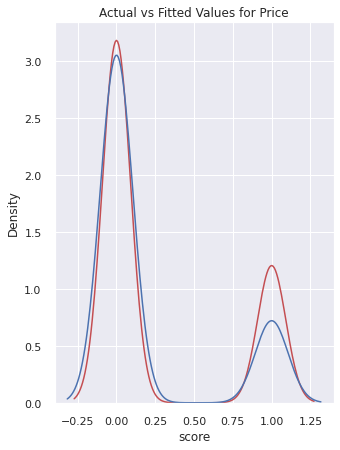

In [142]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Score')


plt.show()
plt.close()

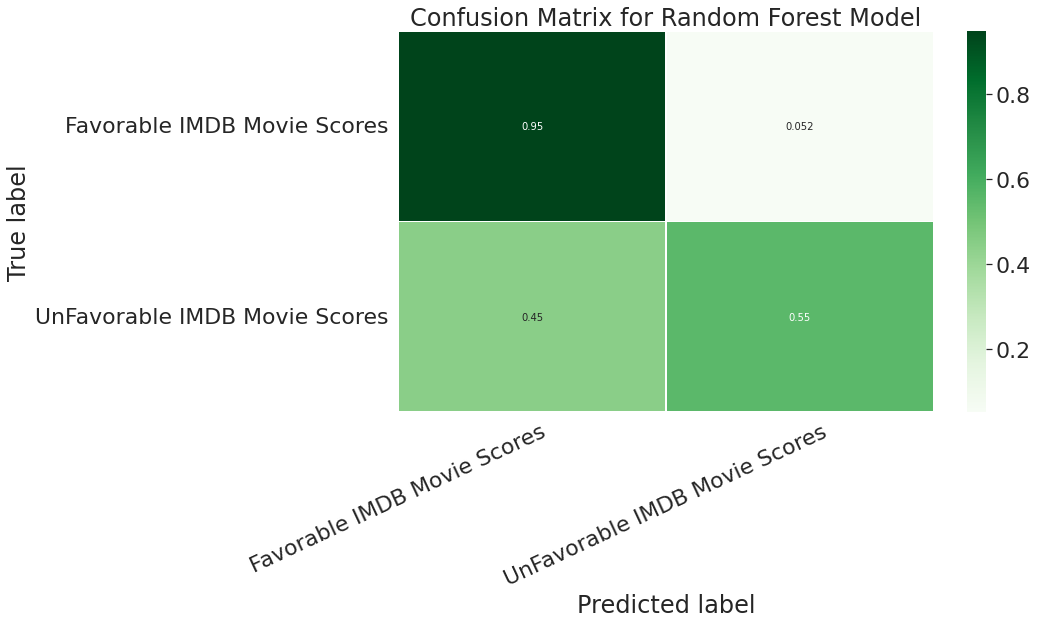

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(12,7))
sns.set(font_scale=2)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Favorable IMDB Movie Scores', 'UnFavorable IMDB Movie Scores', ]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [65]:
Prec = (TP/(TP + FP))
per = round(Prec, 2)
per

0.85

In [66]:
Rec = round(TP/(TP + FN),2)
Rec

0.95

In [67]:
Sen = round(TP/(TP + FN),2)
Sen

0.95

In [68]:
F1 = round(100*((2 * ( per * Sen))/(per + Sen)),2)
F1

89.72

In [69]:

print( 'Precision: Precision is the measure of how reliable a positive classification \nis. From our results, the precision for the good IMDB movie scores can be\ndetermined  by the ratio TP/(TP + FP), which is ' + str(per) + ' . A low precision is indicative \nof a large number of false positives—of the '+ str(FN + TN) +' movie IMDB scores we predicted to obtain \nbad scores, '+ str(FN) + ' actually recieved a good IMDB movie scores.' ) #@title

Precision: Precision is the measure of how reliable a positive classification 
is. From our results, the precision for the good IMDB movie scores can be
determined  by the ratio TP/(TP + FP), which is 0.85 . A low precision is indicative 
of a large number of false positives—of the 136 movie IMDB scores we predicted to obtain 
bad scores, 27 actually recieved a good IMDB movie scores.


In [70]:
print( 'Recall: Recall is the ability of the classifier to find all\nthe positive samples. It can be determined by the ratio: TP/(TP + FN),\nor '+ str(Rec)+ ' for the good IMDB movie scores and '+ str(round(TN/(TN+FP),2)) + ' for the bad IMDB movie scores. A low\nrecall is indicative of a large number of false negatives.') #@title

Recall: Recall is the ability of the classifier to find all
the positive samples. It can be determined by the ratio: TP/(TP + FN),
or 0.95 for the good IMDB movie scores and 0.55 for the bad IMDB movie scores. A low
recall is indicative of a large number of false negatives.


In [71]:
print('F1 score: F1 score is a weighted average of the true positive\nrate (recall) and precision, where the best score is 1.0\nand the worst is 0.0. Our F1 score is ' +str(F1)+'%.' )#@title

F1 score: F1 score is a weighted average of the true positive
rate (recall) and precision, where the best score is 1.0
and the worst is 0.0. Our F1 score is 89.72%.


In [72]:
print('Support: Support is the number of actual occurrences of the class in the specified dataset.\nFor our results, there are '+ str(TP+FN)+ ' actual occurrences for the good IMDB movie scores and '+ str(FP+TN)+ '\nactual occurrences for bad IMDB movie scores.')

Support: Support is the number of actual occurrences of the class in the specified dataset.
For our results, there are 515 actual occurrences for the good IMDB movie scores and 197
actual occurrences for bad IMDB movie scores.


In [73]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.05765392, 0.04873838, 0.07192726, 0.06727328, 0.02171482,
       0.03791888, 0.05141591, 0.16971784, 0.05335785, 0.05068408,
       0.05301534, 0.05353594, 0.06193243, 0.04478315, 0.15633091])

In [74]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.16971783957990463, 'votes'),
 (0.15633090829853766, 'runtime'),
 (0.07192726338026463, 'Domestic_Gross'),
 (0.06727327662228146, 'Worldwide_Gross'),
 (0.0619324316400494, 'gross'),
 (0.05765392140532906, 'Movie_Title'),
 (0.053535935705114286, 'budget'),
 (0.05335785263597243, 'director'),
 (0.053015341471989934, 'star'),
 (0.051415914458645566, 'year'),
 (0.050684084459469696, 'writer'),
 (0.04873838128969764, 'Production_Budget'),
 (0.044783148427180015, 'company'),
 (0.03791887621512739, 'genre'),
 (0.021714824410436148, 'rating')]

# **Display Feature Importance using a Bar Graph Below**

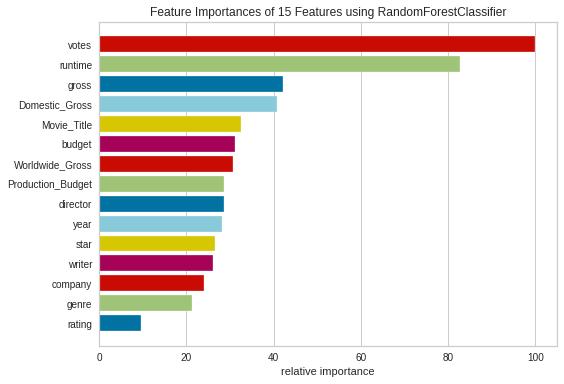

In [75]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances


model = RandomForestClassifier(n_estimators=15)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()

In [163]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in X.columns]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [165]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.020 seconds


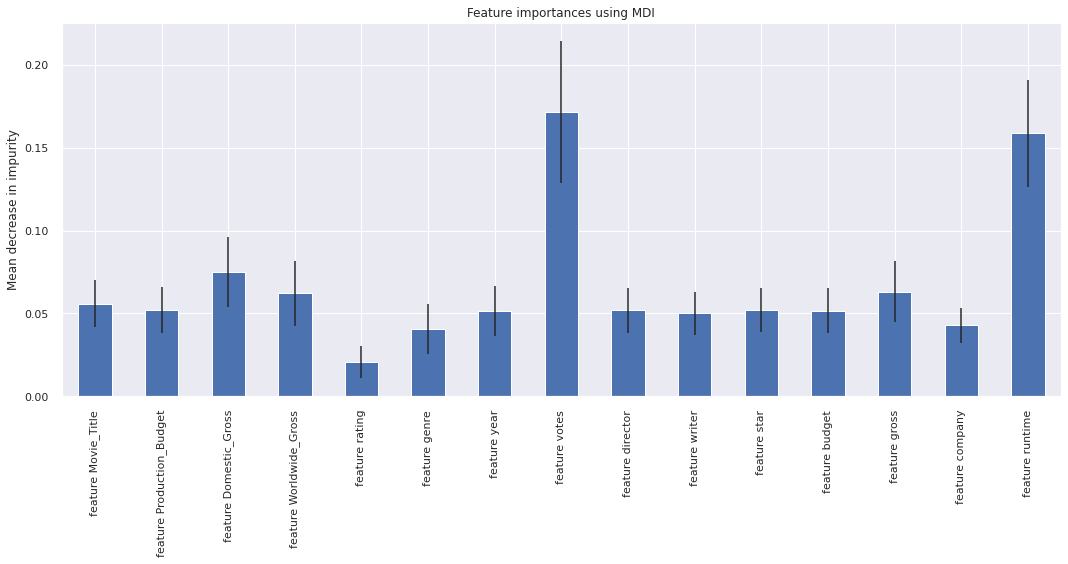

In [166]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

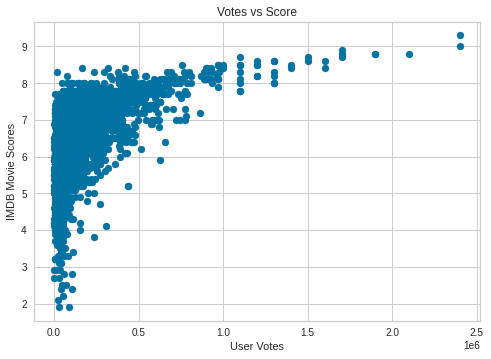

In [76]:
# Scatter plot with votes vs score

plt.scatter(x=o_df['votes'], y=o_df['score'])

plt.title('Votes vs Score')

plt.xlabel('User Votes')

plt.ylabel('IMDB Movie Scores')

plt.show()

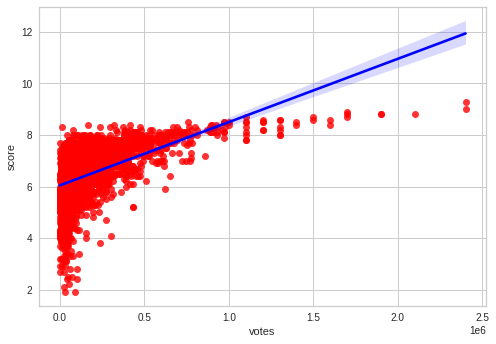

In [77]:
import seaborn as sns
# Plot votes vs score using seaborn

sns.regplot(x='votes', y='score', data=o_df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

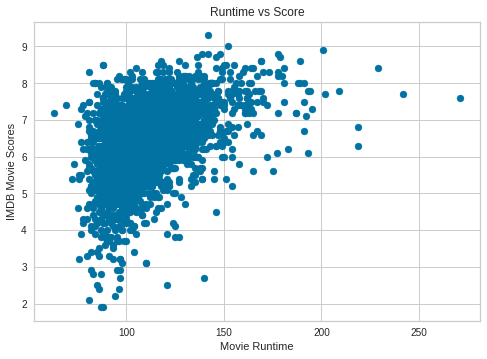

In [78]:
# Scatter plot with runtime vs score

plt.scatter(x=o_df['runtime'], y=o_df['score'])

plt.title('Runtime vs Score')

plt.xlabel('Movie Runtime')

plt.ylabel('IMDB Movie Scores')

plt.show()

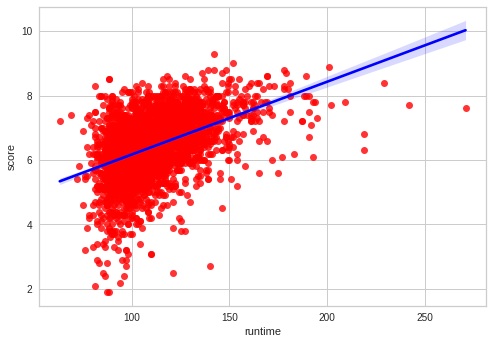

In [79]:
# Scatter plot with runtime vs score using seaborn
sns.regplot(x='runtime', y='score', data=o_df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

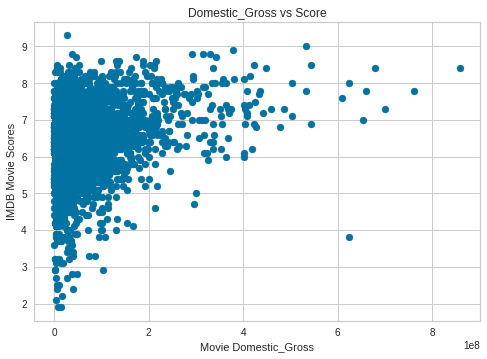

In [82]:
# Scatter plot with Domestic_Gross vs score

plt.scatter(x=o_df['Domestic_Gross'], y=o_df['score'])

plt.title('Domestic_Gross vs Score')

plt.xlabel('Movie Domestic_Gross')

plt.ylabel('IMDB Movie Scores')

plt.show()

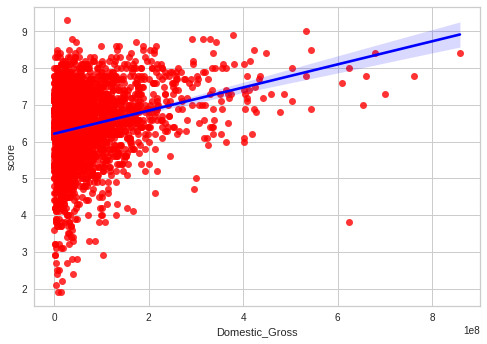

In [83]:
# Scatter plot with Domestic_Gross vs score using seaborn
sns.regplot(x='Domestic_Gross', y='score', data=o_df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

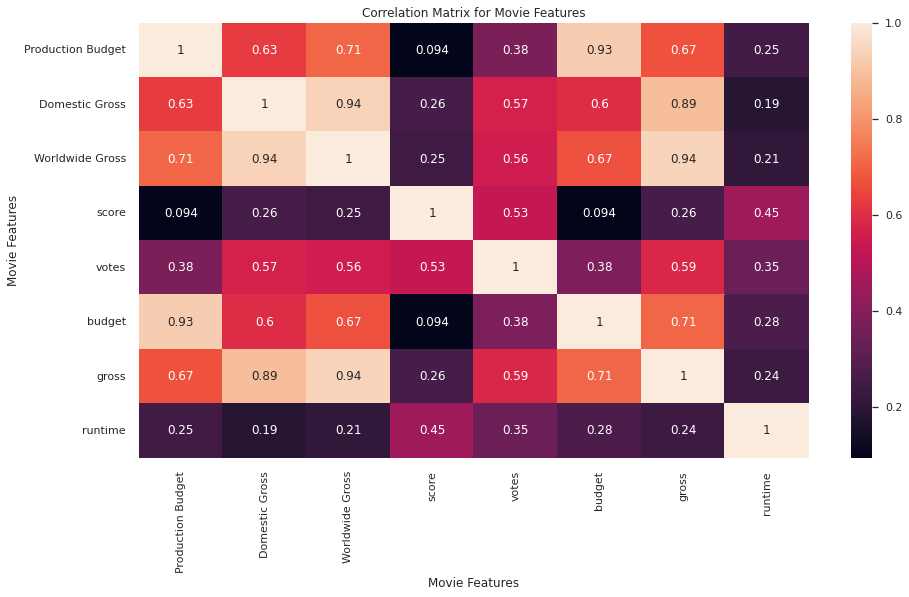

In [128]:
# Create Correlation Matrix Heat Map to show feature dependancy
correlation_matrix = c_df.corr(method='pearson') 
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Movie Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=3)
rf_model.fit(X, y)

RandomForestRegressor(max_depth=3, n_estimators=200)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 78)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}


# **Random Hyperparameter Grid**

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [100, 200, 500, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 7, 9, 11]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 5, 7, 9, 11],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 500, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_Grid= GridSearchCV(estimator = rf, param_grid = random_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the random search model
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [3, 5, 7, 9, 11],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
print (f' Train Accuracy - : {rf_Grid.score(X_train, y_train):.3f}')
print (f' Test Accuracy - : {rf_Grid.score(X_test, y_test):.3f}')

 Train Accuracy - : 0.987
 Test Accuracy - : 0.820


In [167]:
import numpy as np

from sklearn.svm import LinearSVC


class NaivelyCalibratedLinearSVC(LinearSVC):
    """LinearSVC with `predict_proba` method that naively scales
    `decision_function` output."""

    def fit(self, X, y):
        super().fit(X, y)
        df = self.decision_function(X)
        self.df_min_ = df.min()
        self.df_max_ = df.max()

    def predict_proba(self, X):
        """Min-max scale output of `decision_function` to [0,1]."""
        df = self.decision_function(X)
        calibrated_df = (df - self.df_min_) / (self.df_max_ - self.df_min_)
        proba_pos_class = np.clip(calibrated_df, 0, 1)
        proba_neg_class = 1 - proba_pos_class
        proba = np.c_[proba_neg_class, proba_pos_class]
        return proba

In [168]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = NaivelyCalibratedLinearSVC(C=1.0)
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (svc, "SVC"),
    (rfc, "Random forest"),
]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


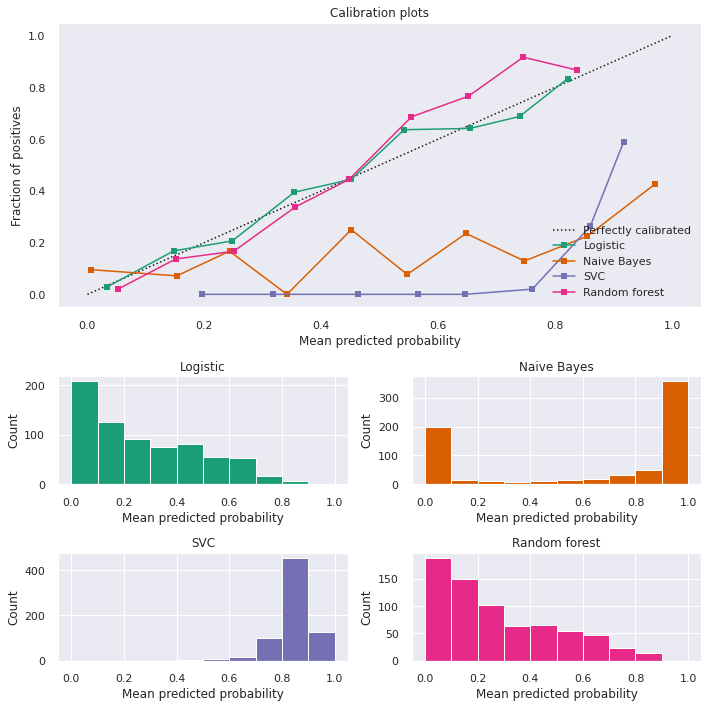

In [171]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()

# **For instance, a well calibrated (binary) classifier should classify the samples such that for the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.**

In [ ]:
!pip install wandb


     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 142 kB 47.6 MB/s 
     |████████████████████████████████| 180 kB 46.2 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=88a2da202a1e77c01a248c26252bc6c1877ff185d9f26c2d371c81265c3c2f41
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=d63b27fc4bdf9ac3f5f6ea6c7bb54cefc29128d3456603bbfcd8182a14ef5e14
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import datasets, cluster

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
import wandb

wandb.login()

True

In [ ]:
import wandb

wandb.init(project="my-test-project", entity="kevinc")

# **Regression**

In [ ]:
# Load data
housing = datasets.fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target
X, y = X[::2], y[::2]  # subsample for faster demo
wandb.errors.term._show_warnings = False
# ignore warnings about charts being built from subset of data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train model, get predictions
reg = Ridge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# **Step 2: Initialize W&B run**

In [ ]:
run = wandb.init(project='my-scikit-integration', name="regression")

# **Step 3: Visualize model performance**

In [ ]:
wandb.sklearn.plot_residuals(reg, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
wandb.sklearn.plot_outlier_candidates(reg, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
wandb.sklearn.plot_regressor(reg, X_train, X_test, y_train, y_test, model_name='Ridge')

wandb.finish()

wandb: 
wandb: Plotting Ridge.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged summary metrics.
wandb: Logged learning curve.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged outlier candidates.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"
wandb: Logged residuals.


# **Classification**

In [ ]:
# Load data
wbcd = wisconsin_breast_cancer_data = datasets.load_breast_cancer()
feature_names = wbcd.feature_names
labels = wbcd.target_names

X_train, X_test, y_train, y_test = train_test_split(wbcd.data, wbcd.target, test_size=0.2)


# Train model, get predictions
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# **Step 2: Initialize W&B run**

In [ ]:
run = wandb.init(project='my-scikit-integration', name="classification")

# **Step 3: Visualize model performance**

In [ ]:
wandb.sklearn.plot_class_proportions(y_train, y_test, labels)

# **Learning Curve**

In [ ]:
wandb.sklearn.plot_learning_curve(model, X_train, y_train)

# **ROC**

In [ ]:
wandb.sklearn.plot_roc(y_test, y_probas, labels)

# **Precision Recall Curve**

In [ ]:
wandb.sklearn.plot_precision_recall(y_test, y_probas, labels)

# **Feature Importances**

In [ ]:
wandb.sklearn.plot_feature_importances(model);

# **All-in-one: Classifier Plot**
Using this all in one API one can:

# Log feature importance
Log learning curve
Log confusion matrix
Log summary metrics
Log class proportions
Log calibration curve
Log roc curve
Log precision recall curve **bold text**

In [ ]:
wandb.sklearn.plot_classifier(model, 
                              X_train, X_test, 
                              y_train, y_test, 
                              y_pred, y_probas, 
                              labels, 
                              is_binary=True, 
                              model_name='RandomForest')

wandb.finish()

wandb: 
wandb: Plotting RandomForest.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


# **Clustering**

In [ ]:
# Load data
iris = datasets.load_iris()
X, y = iris.data, iris.target
names = iris.target_names

def get_label_ids(classes):
    return np.array([names[aclass] for aclass in classes])
labels = get_label_ids(y)

# Train model
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(X)

# **Step 2: Initialize W&B run**

In [ ]:
run = wandb.init(project='my-scikit-integration', name="clustering")

# **Step 3: Visualize model performance**

# **Elbow Plot**

In [ ]:
wandb.sklearn.plot_elbow_curve(kmeans, X)

# **Silhouette Plot**

In [ ]:
wandb.sklearn.plot_silhouette(kmeans, X, labels)

# **All in one: Clusterer Plot**
Using this all-in-one API you can:

Log elbow curve
Log silhouette plot

In [ ]:
wandb.sklearn.plot_clusterer(kmeans, X, cluster_labels, labels, 'KMeans')

wandb.finish()

wandb: 
wandb: Plotting KMeans.
wandb: Logged elbow curve.
wandb: Logged silhouette plot.
